In [680]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.patches import Rectangle
import matplotlib.transforms as transforms



# Problem Formulation

## Simulation for idea

Firstly, we define a randomly mass distribution object. Therefore, the center of the global mass is also different

In [681]:
length = 1.0  # meters
width = 0.3   # meters
total_mass = 1.0  # kg

Nx = 4  # number of cells in x
Ny = 2  # number of cells in y

Nx = 4
Ny = 2

# Step 1: Define positions (cell center positions)
x = np.linspace(-length / 2 + length / (2 * Nx), length / 2 - length / (2 * Nx), Nx)
y = np.linspace(-width / 2 + width / (2 * Ny), width / 2 - width / (2 * Ny), Ny)

X, Y = np.meshgrid(x, y)

# Step 2: Exaggerated random mass distribution
# Use exponential distribution to create big differences in mass values
CellMassMatrix = np.random.exponential(scale=1.0, size=(Ny, Nx))

# Optional: boost some random cells further
boost_indices = np.random.choice(Nx * Ny, size=2, replace=False)
CellMassMatrix.flat[boost_indices] *= np.random.uniform(3, 5, size=2)

# Step 3: Normalize to total mass
CellMassMatrix = CellMassMatrix / np.sum(CellMassMatrix) * total_mass

# Step 4: Compute natural global COM
com_x = np.sum(X * CellMassMatrix) / total_mass
com_y = np.sum(Y * CellMassMatrix) / total_mass

print(f"Natural COM from random mass: ({com_x:.4f}, {com_y:.4f}) m")

Natural COM from random mass: (-0.0871, -0.0048) m


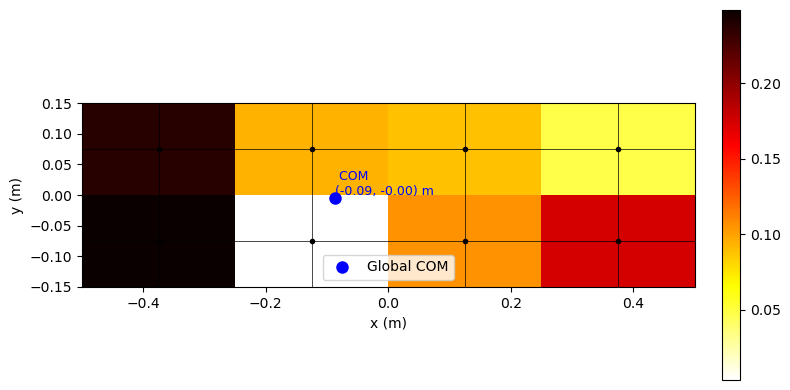

In [682]:
fig, ax = plt.subplots(figsize=(8, 4))

# Heatmap of cell mass (flipped colormap)
cax = ax.imshow(CellMassMatrix, cmap='hot_r', origin='lower',
                extent=[x[0] - length / (2 * Nx), x[-1] + length / (2 * Nx),
                        y[0] - width / (2 * Ny), y[-1] + width / (2 * Ny)])

# Plot center of mass of each cell (cell centers)
for i in range(Ny):
    for j in range(Nx):
        ax.plot(X[i, j], Y[i, j], 'ko', markersize=3)

# Plot global center of mass
ax.plot(com_x, com_y, 'bo', markersize=8, label='Global COM')
ax.text(com_x, com_y, f' COM\n({com_x:.2f}, {com_y:.2f}) m',
        color='blue', fontsize=9, ha='left', va='bottom')

# Draw grid lines
for xi in x:
    ax.axvline(xi, color='black', linewidth=0.5)
for yi in y:
    ax.axhline(yi, color='black', linewidth=0.5)

# Labels and legend
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.legend()

# Colorbar
plt.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

Then, by using the defined object, we can run a simulation by dynamics of the free fall of non-uniform object. Firstly, we should calculate the momentum of inertia

In [683]:
# Step 1: Create grid of positions
X, Y = np.meshgrid(x, y)  # Shape (Ny, Nx)

# Step 2: Compute distance squared from COM
dx2 = (X - com_x) ** 2
dy2 = (Y - com_y) ** 2

# Step 3: Compute moment of inertia
I = np.sum(CellMassMatrix * (dx2 + dy2))

print(f"Moment of inertia I = {I:.6f} kg·m²")

Moment of inertia I = 0.102269 kg·m²


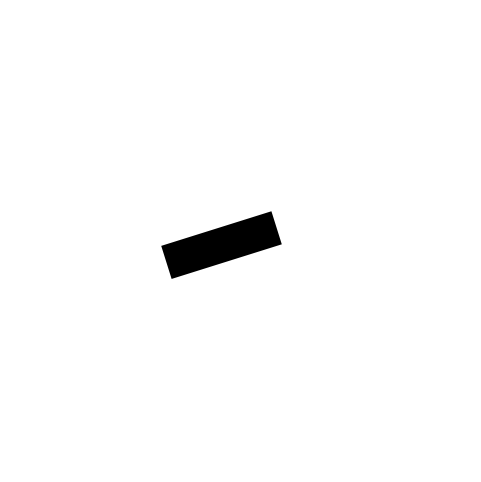

In [ ]:
L = 0.1       

omega = L / I  #


# Time parameters
dt = 0.05
frames = 200

# Prepare plot
fig, ax = plt.subplots(figsize=(6, 6))

# Create Rectangle (基于中心绘制)
rect = Rectangle(
    (-length / 2, -width / 2),  # 左下角位置，确保绕中心旋转
    length,
    width,
    facecolor='black'
)
ax.add_patch(rect)

# Axes setup
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')  # 保持比例
ax.axis('off')  # 可选：不显示坐标轴，更干净

# Update function
def update(frame):
    t = frame * dt
    theta = omega * t  # 旋转角度

    # Transform：先平移到旋转中心，再旋转
    trans = transforms.Affine2D()
    trans.translate(-com_x, -com_y)  # 平移到旋转中心
    trans.rotate(theta)              # 围绕原点旋转
    trans.translate(com_x, com_y)    # 平移回旋转中心位置
    trans += ax.transData

    rect.set_transform(trans)

    return rect,

# Animate
ani = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

# Display in Jupyter
HTML(ani.to_jshtml())